<a href="https://colab.research.google.com/github/Tharani0409/DS/blob/main/Credit_risk_scoring_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# importing libraries to create different types of machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# importing model evaluation libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix


In [4]:
df = pd.read_csv('train.csv', low_memory=False)

In [5]:
#Exploratory data analysis
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
df.shape

(100000, 28)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [9]:
# finding the key statistical values of the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [10]:
# finding the key statistical values of the categorical columns
df.describe(exclude = np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [11]:
df.Month.value_counts()

,count
Month,
January,12500
February,12500
March,12500
April,12500
May,12500
June,12500
July,12500
August,12500


In [12]:
# finding the unique values for each column in the data to find unwanted values
for i in df:
    print('\n', i, df[i].unique())


 ID ['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']

 Customer_ID ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']

 Month ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

 Name ['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']

 Age ['23' '-500' '28_' ... '4808_' '2263' '1342']

 SSN ['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

 Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

 Monthly_Inhand_Salary [1824.84333333           nan 3037.98666667 ... 3097.00833333 1929.90666667
 3359.41583333]

 Num_Bank_Accounts [   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 

In [13]:
#Data Preprocessing
#Missing value imputation and typecasting
def preprocess_data(data, mvi_groupby=None, mvi_customval=None, column=None,
                    unwanted_value_replace=None, unwanted_value_strip=None, datatype=None):
    try:
        # 1. Strip unwanted characters from string columns
        if unwanted_value_strip is not None and data[column].dtype == object:
            data[column] = data[column].str.strip(unwanted_value_strip)
            print(f"\nTrailing & leading '{unwanted_value_strip}' removed from '{column}'")

        # 2. Replace unwanted values with NaN
        if unwanted_value_replace is not None:
            data[column] = data[column].replace(unwanted_value_replace, np.nan)
            print(f"\nUnwanted value '{unwanted_value_replace}' in '{column}' replaced with NaN")

        # 3. Impute missing values using mode, grouped by another column
        if mvi_groupby and column:
            data[column] = data[column].replace('', np.nan)
            group_mode = data.groupby(mvi_groupby)[column].transform(lambda x: x.mode().iat[0] if not x.mode().empty else np.nan)
            data[column] = data[column].fillna(group_mode)
            print(f"\nMissing values in '{column}' imputed with mode, grouped by '{mvi_groupby}'")

        # 4. Impute missing values using a custom value provided by the user
        if mvi_customval is not None:
            data[column] = data[column].replace('', np.nan)  # Handle empty strings as NaN
            data[column].fillna(mvi_customval, inplace=True)
            print(f"\nMissing values in '{column}' replaced with '{mvi_customval}'")

        # 5. Change the data type of the column based on user input
        if datatype is not None:
            data[column] = data[column].astype(datatype)
            print(f"\nData type of '{column}' changed to '{datatype}'")

        print('----------------------------------------------------')

    except Exception as e:
        print(f"An error occurred while processing '{column}': {e}")

In [14]:
print("Column: Name")
preprocess_data(data = df, column = 'Name', mvi_groupby = 'Customer_ID')

print("Column: Type_of_Loan")
preprocess_data(data = df, column = 'Type_of_Loan', mvi_customval = 'Not Specified')

print("Column: SSN")
preprocess_data(data = df, column = 'SSN', unwanted_value_replace = '#F%$D@*&8', mvi_groupby = 'Customer_ID')

print("Column: Occupation")
preprocess_data(data = df, column = 'Occupation', unwanted_value_replace = '_______', mvi_groupby = 'Customer_ID',)

print("Column: Credit_Mix")
preprocess_data(data = df, column = 'Credit_Mix', unwanted_value_replace = '_', mvi_groupby = 'Customer_ID')

print("Column: Payment_Behaviour")
preprocess_data(data = df, column = 'Payment_Behaviour', unwanted_value_replace = '!@9#%8', mvi_groupby = 'Customer_ID')

print("Column: Age")
preprocess_data(data = df, column = 'Age', unwanted_value_strip = '_', mvi_groupby = 'Customer_ID', datatype = 'int')

print("Column: Annual_Income")
preprocess_data(data = df, column = 'Annual_Income', unwanted_value_strip = '_', mvi_groupby = 'Customer_ID', datatype = 'float')

print("Column: Outstanding_Debt")
preprocess_data(data = df, column = 'Outstanding_Debt', unwanted_value_strip = '_', mvi_groupby = 'Customer_ID', datatype = 'float')

print("Column: Amount_invested_monthly")
preprocess_data(data = df, column = 'Amount_invested_monthly', unwanted_value_strip = '_', mvi_groupby = 'Customer_ID', datatype = 'float')

print("Column: Num_of_Loan")
preprocess_data(data = df, column = 'Num_of_Loan', unwanted_value_strip = '_', mvi_groupby = 'Customer_ID', datatype = 'int')

print("Column: Num_of_Delayed_Payment")
preprocess_data(data = df, column = 'Num_of_Delayed_Payment', unwanted_value_strip = '_', mvi_groupby = 'Customer_ID', datatype = 'float')

print("Column: Changed_Credit_Limit")
preprocess_data(data = df, column = 'Changed_Credit_Limit', unwanted_value_strip = '_', unwanted_value_replace = '_', mvi_groupby = 'Customer_ID',datatype = 'float')

print("Column: Monthly_Balance")
preprocess_data(data = df,  column = 'Monthly_Balance', unwanted_value_strip = '_', unwanted_value_replace = '__-333333333333333333333333333__',mvi_groupby = 'Customer_ID', datatype = 'float')



Column: Name

Missing values in 'Name' imputed with mode, grouped by 'Customer_ID'
----------------------------------------------------
Column: Type_of_Loan

Missing values in 'Type_of_Loan' replaced with 'Not Specified'
----------------------------------------------------
Column: SSN

Unwanted value '#F%$D@*&8' in 'SSN' replaced with NaN


<ipython-input-13-0cfb86dfe97e>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mvi_customval, inplace=True)



Missing values in 'SSN' imputed with mode, grouped by 'Customer_ID'
----------------------------------------------------
Column: Occupation

Unwanted value '_______' in 'Occupation' replaced with NaN

Missing values in 'Occupation' imputed with mode, grouped by 'Customer_ID'
----------------------------------------------------
Column: Credit_Mix

Unwanted value '_' in 'Credit_Mix' replaced with NaN

Missing values in 'Credit_Mix' imputed with mode, grouped by 'Customer_ID'
----------------------------------------------------
Column: Payment_Behaviour

Unwanted value '!@9#%8' in 'Payment_Behaviour' replaced with NaN

Missing values in 'Payment_Behaviour' imputed with mode, grouped by 'Customer_ID'
----------------------------------------------------
Column: Age

Trailing & leading '_' removed from 'Age'

Missing values in 'Age' imputed with mode, grouped by 'Customer_ID'

Data type of 'Age' changed to 'int'
----------------------------------------------------
Column: Annual_Income

Tra

In [15]:
# creating a function that picks the year and month and then combines them to give total number of months
def credit_history_in_months(val):
    if pd.notnull(val):
        years = int(val.split(' ')[0])
        month = int(val.split(' ')[3])
        return (years*12)+month
    else:
        return val

# applying the function to the column
df['Credit_History_Age'] = df['Credit_History_Age'].apply(lambda x: credit_history_in_months(x)).astype(float)

print('Column: Credit_History_Age')
preprocess_data(data = df, column = 'Credit_History_Age', mvi_groupby = 'Customer_ID')

Column: Credit_History_Age

Missing values in 'Credit_History_Age' imputed with mode, grouped by 'Customer_ID'
----------------------------------------------------


In [16]:
# Impute with mode (most common value)
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median())

# Impute with mode (most common value)
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].mode()[0])

In [17]:
df.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [18]:
df.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,int64
SSN,object
Occupation,object
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [19]:
def outlier_capping(data, threshold=1.5):

    # making a copy of the input DataFrame
    data_copy = data.copy()

    # creating a empty list to save the outlier indices
    outlier_indices = []

    # calculating quartile 1 and 3 for every numerical column in the data
    for column in data_copy.columns:
        if pd.api.types.is_numeric_dtype(data_copy[column]):
            # calculating quartiles
            Q1 = data_copy[column].quantile(0.25)
            Q3 = data_copy[column].quantile(0.75)
            # calculating inter-quartile range
            IQR = Q3 - Q1

            # defining the upper and lower outlier bounds
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR

            # identifying outliers
            outliers = data_copy[(data_copy[column] < lower_bound) | (data_copy[column] > upper_bound)]
            outlier_indices.extend(outliers.index)

            # capping outliers
            data_copy[column] = np.where(data_copy[column] < lower_bound, lower_bound, data_copy[column])
            data_copy[column] = np.where(data_copy[column] > upper_bound, upper_bound, data_copy[column])

    # removing duplicates from outlier_indices list
    outlier_indices = list(set(outlier_indices))

    # returning the dataframe with capped outliers
    return data_copy, outlier_indices

# running the function to cap all the outliers in the data
df_clean, outliers = outlier_capping(df)

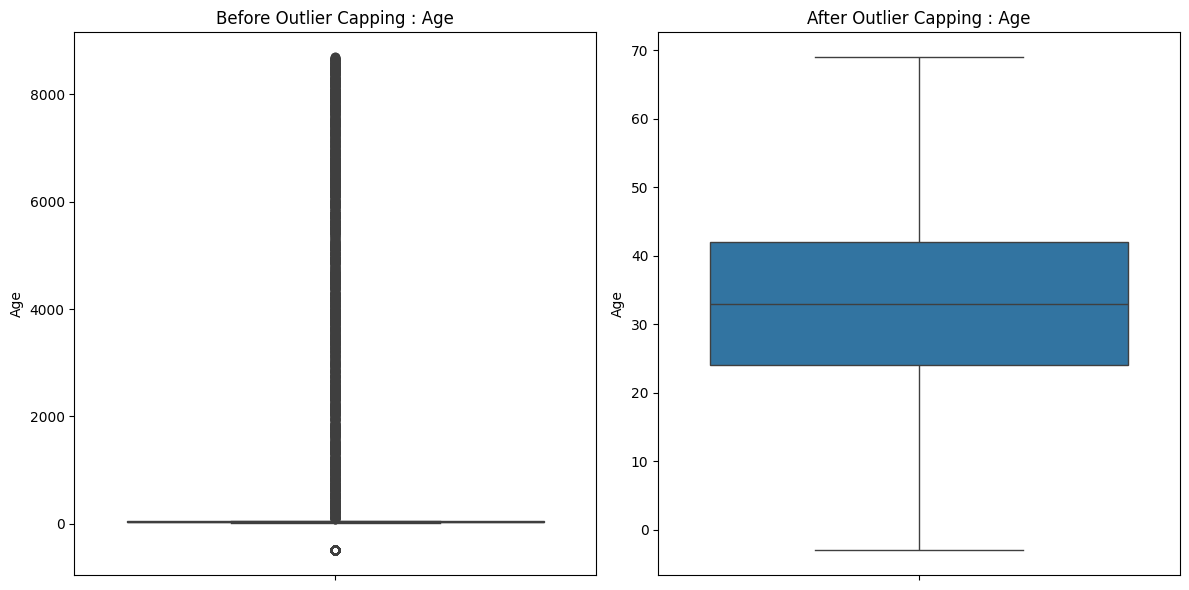

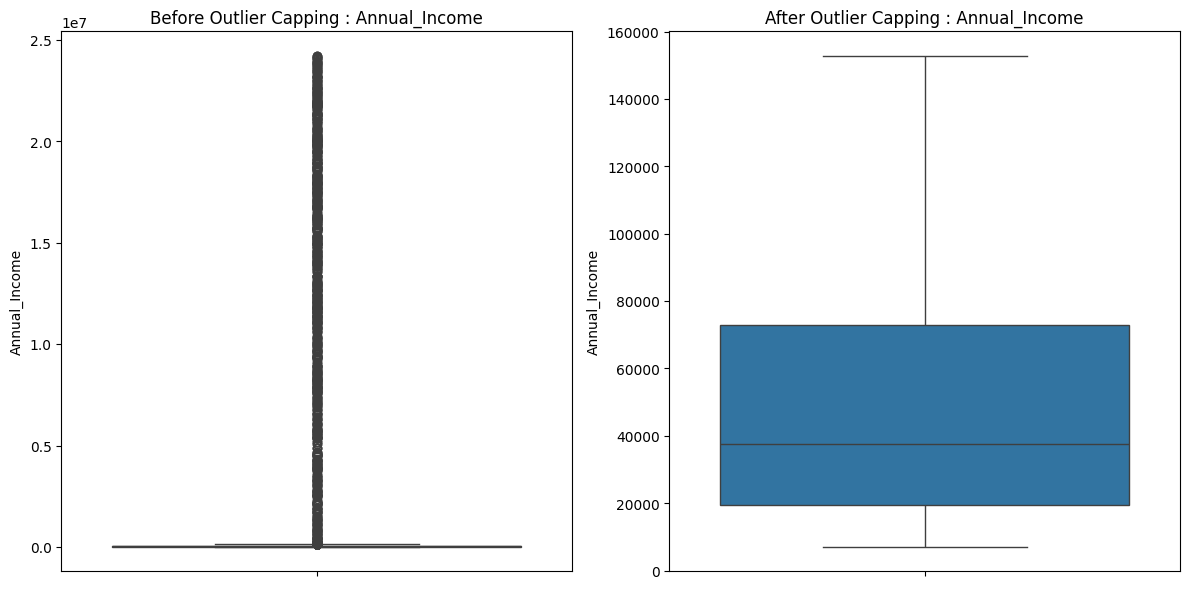

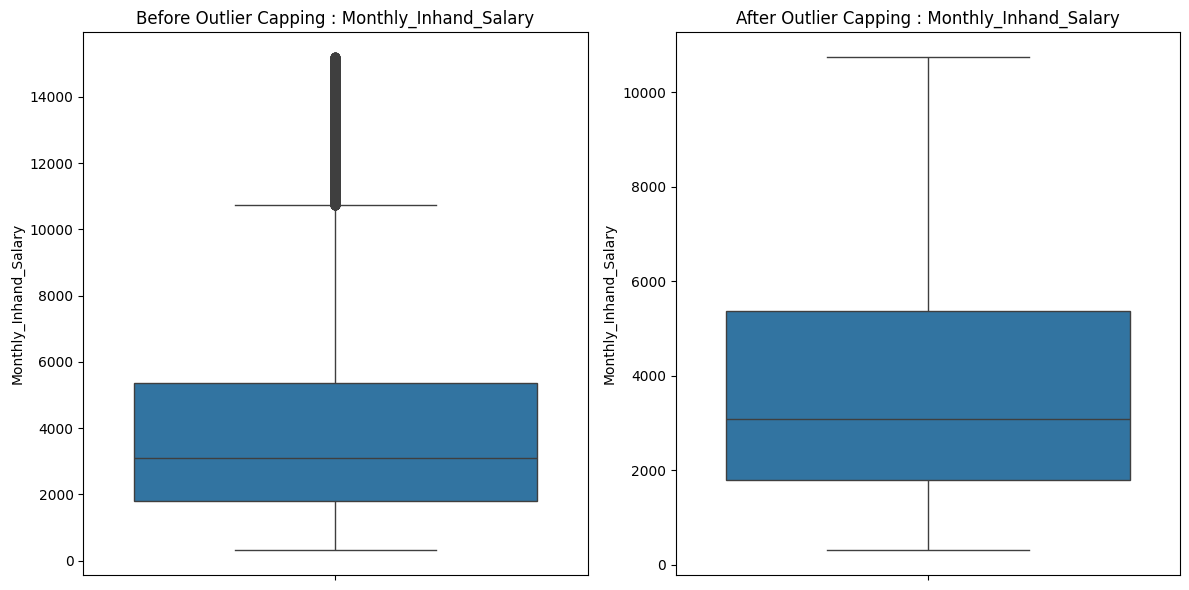

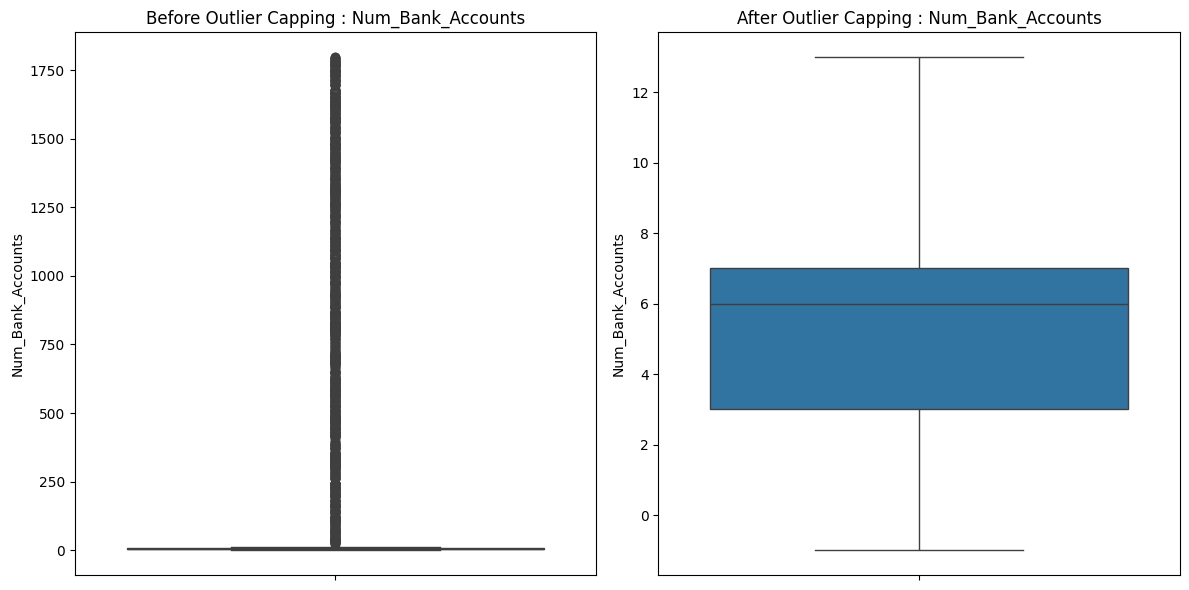

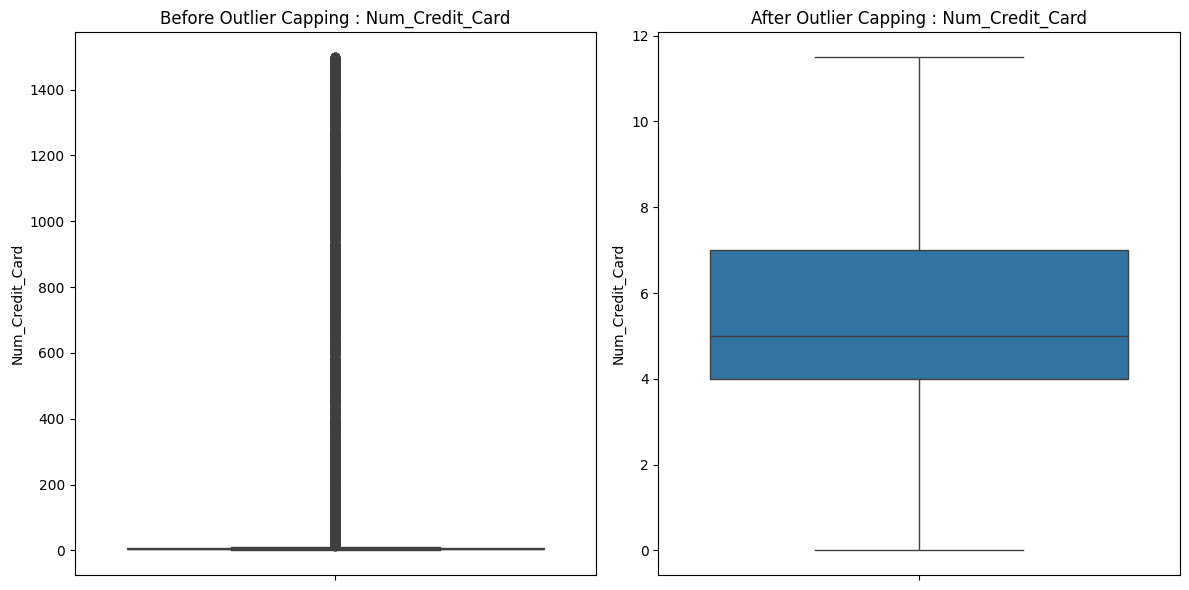

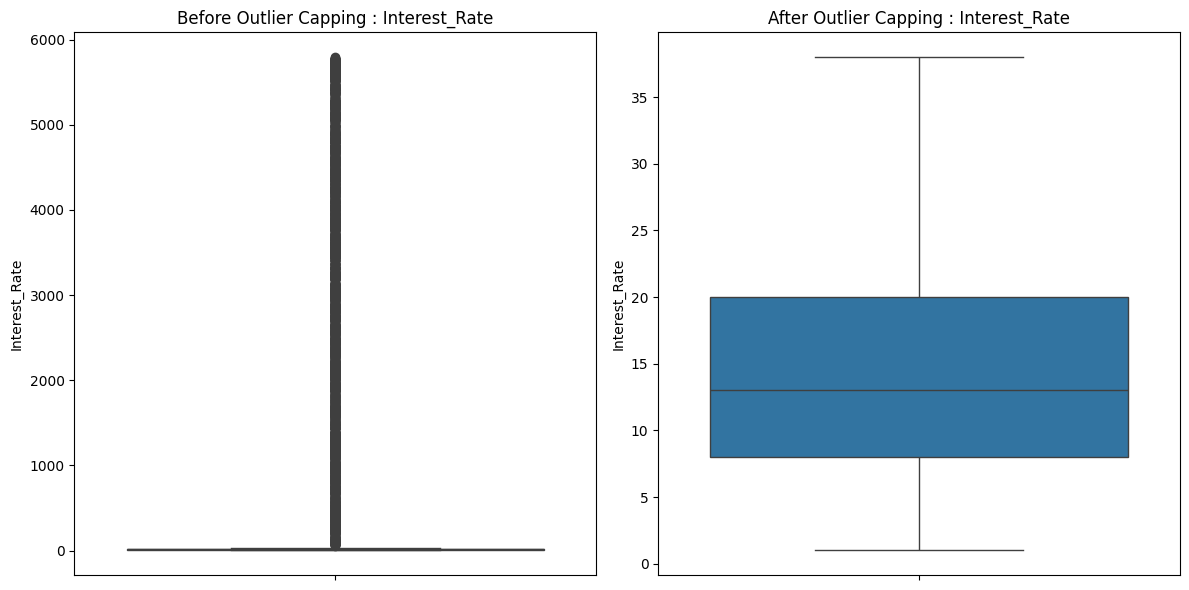

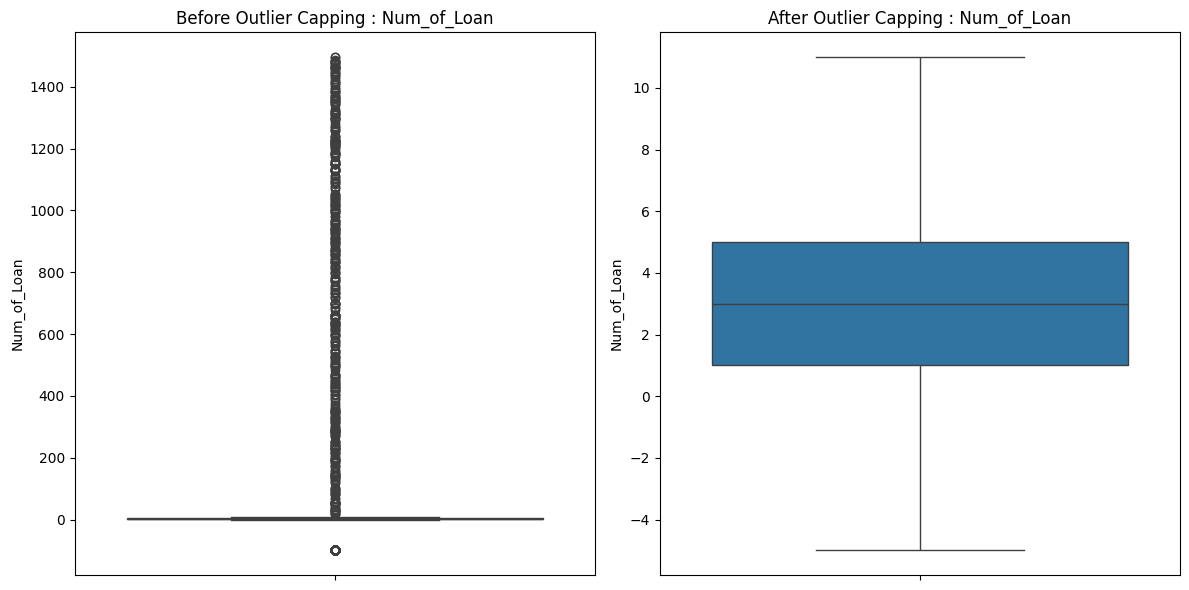

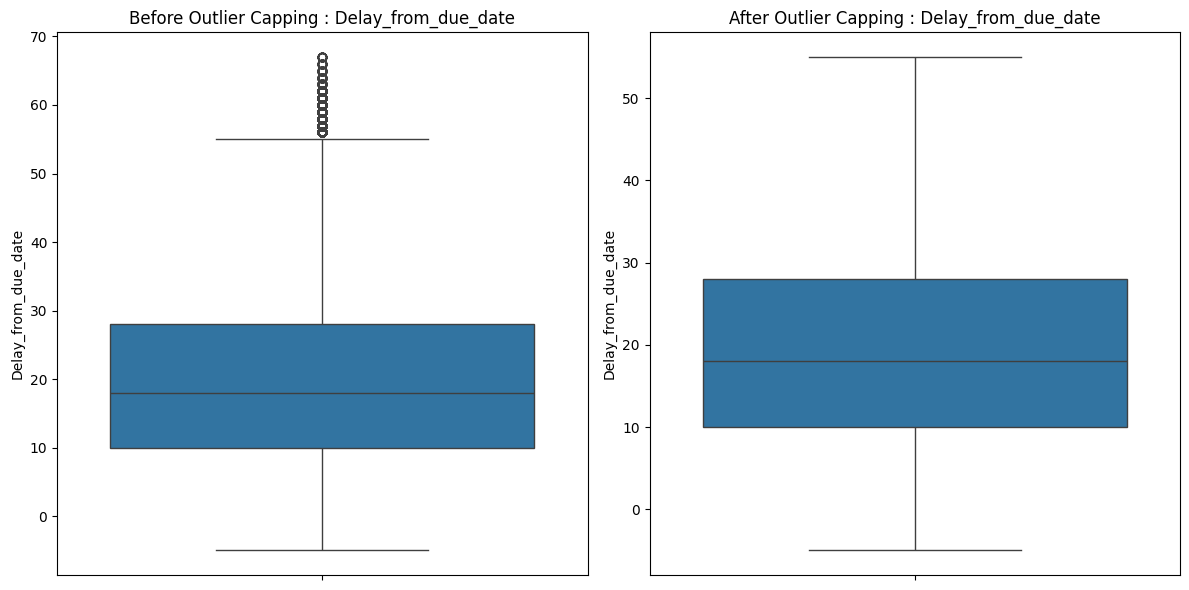

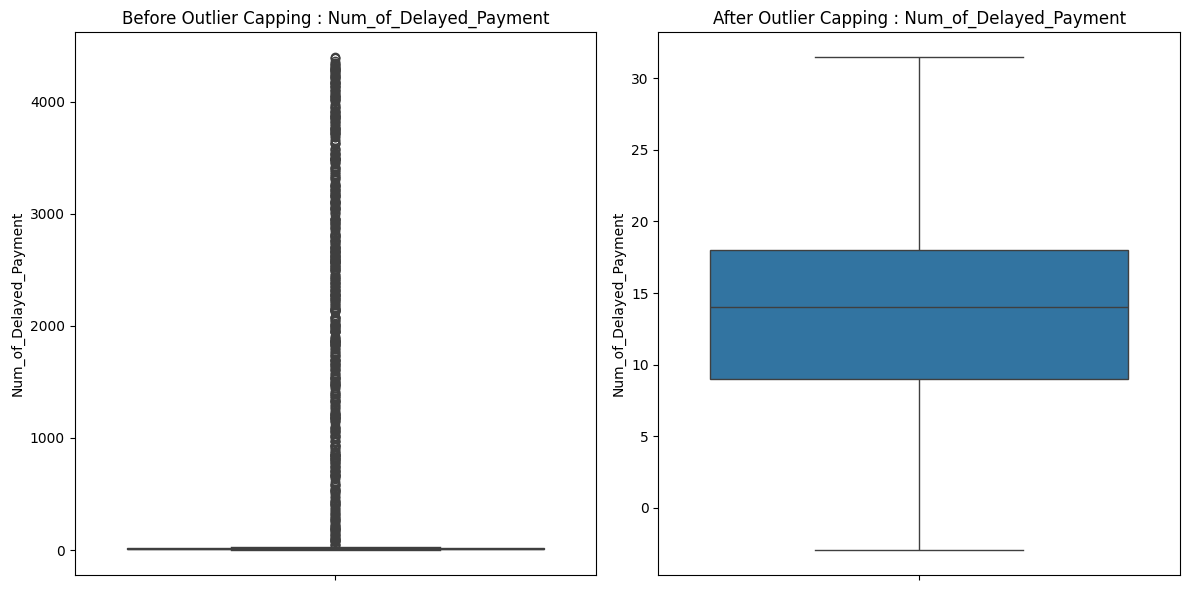

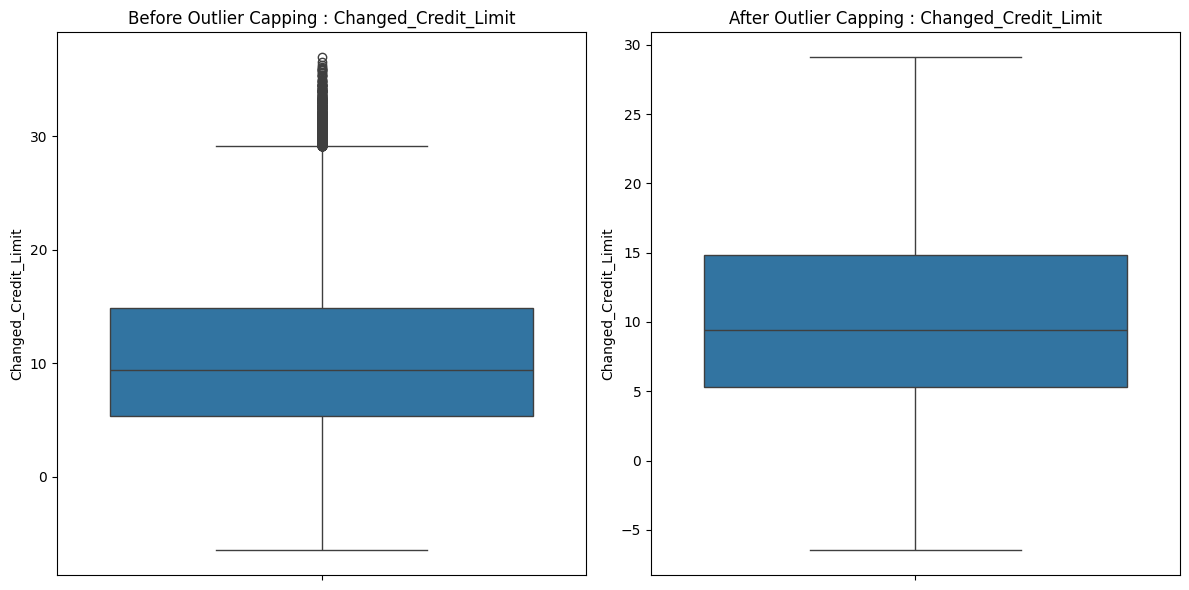

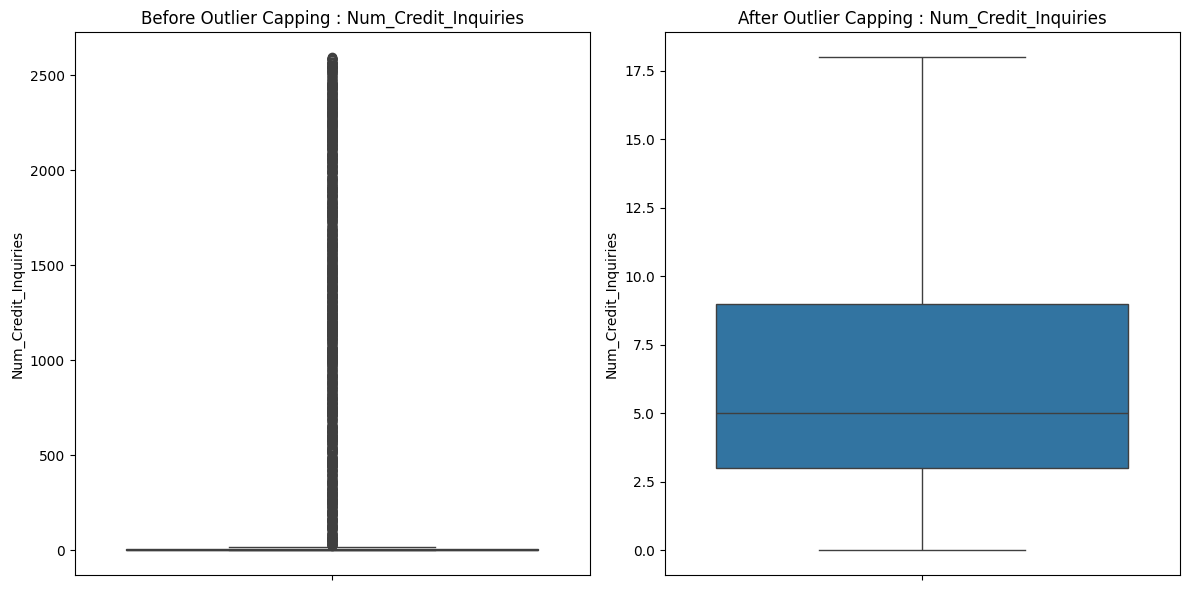

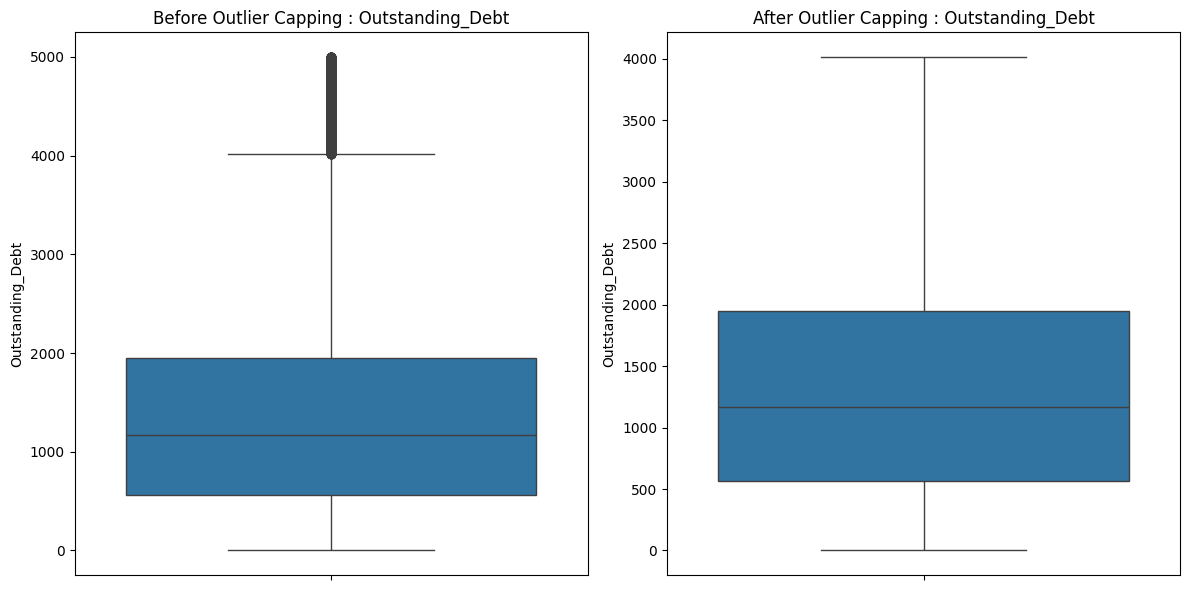

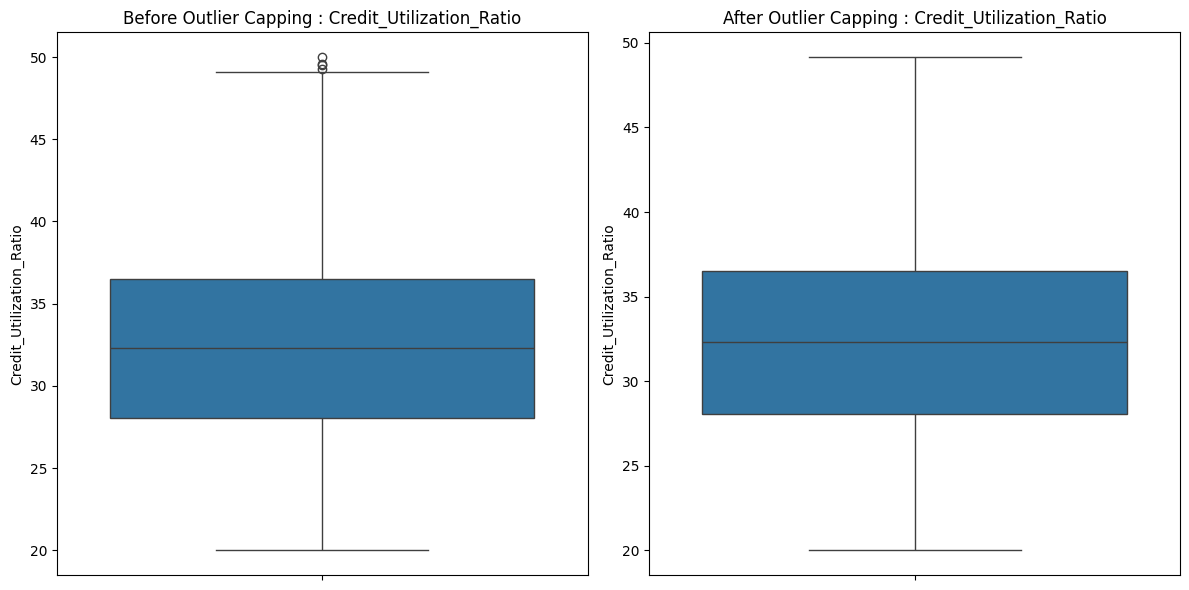

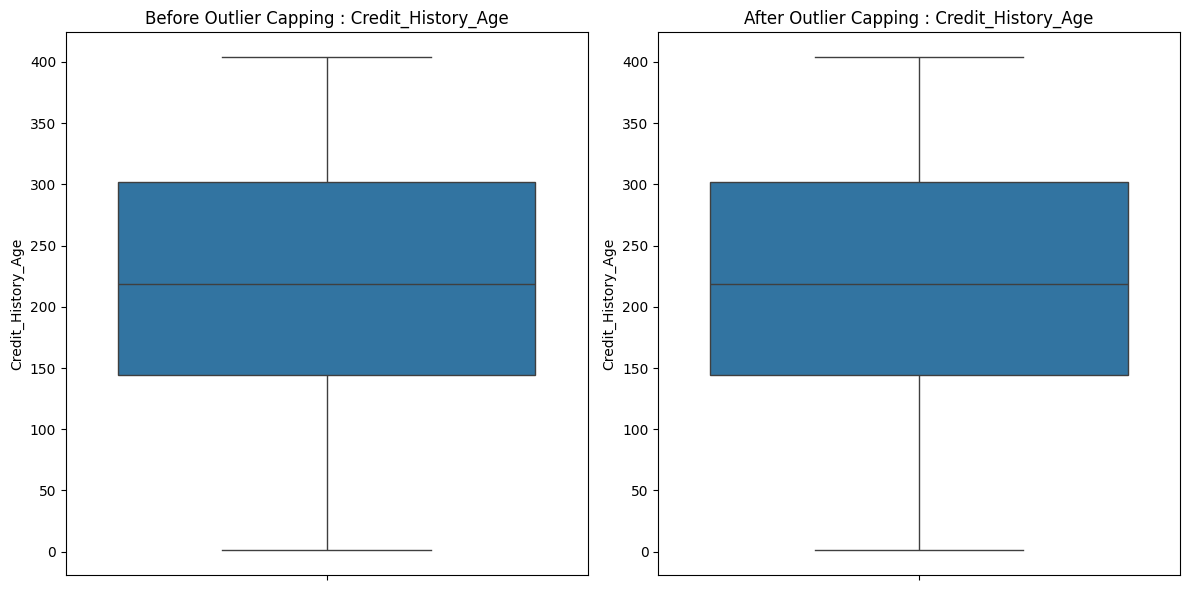

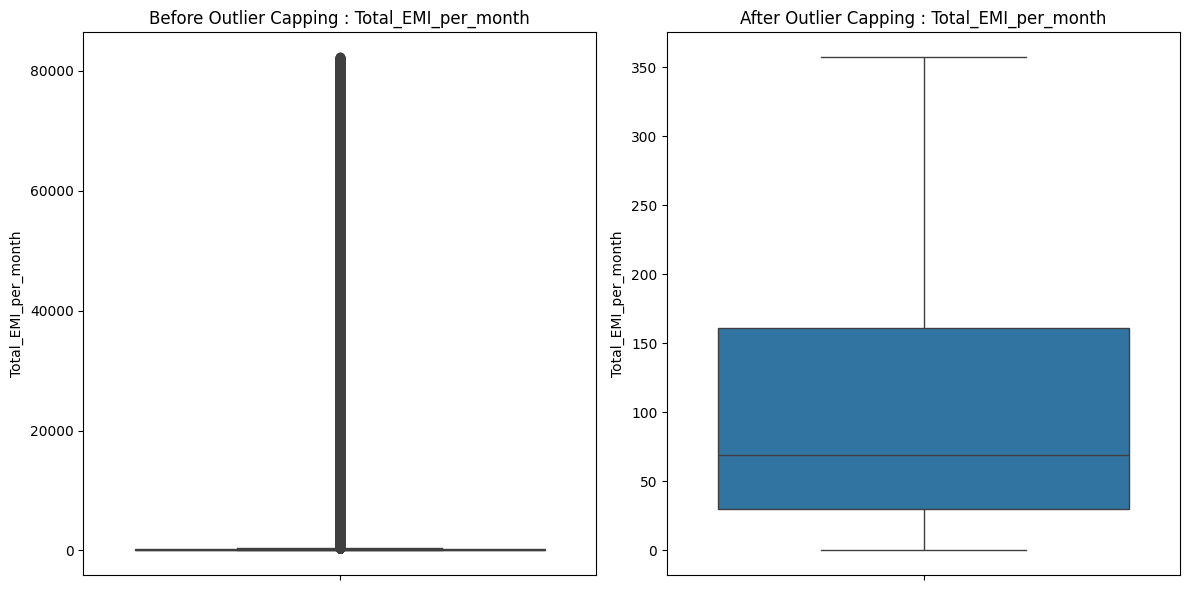

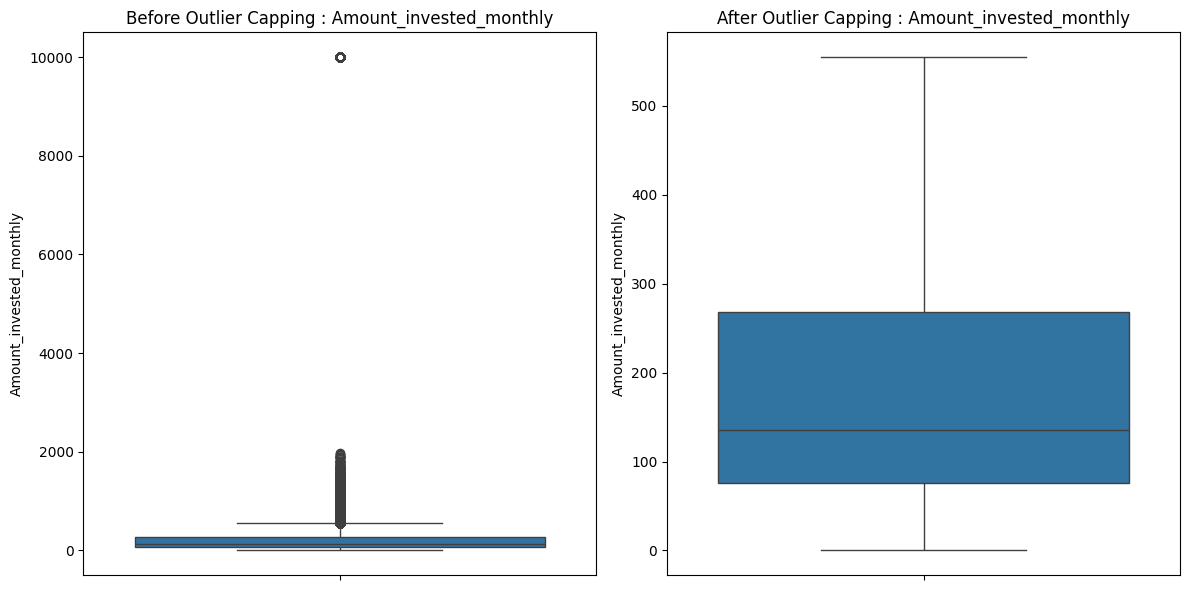

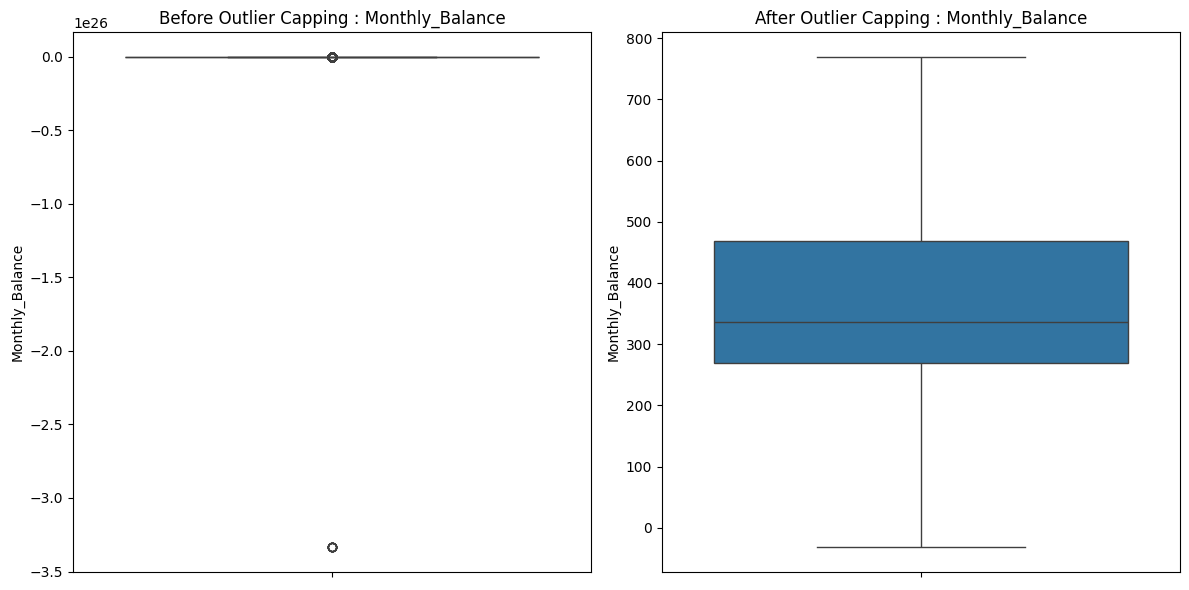

In [20]:
# comparing the columns with and without the outliers
def outlier_capping_comparison(data, data_processed, outlier_indices):
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            plt.figure(figsize=(12, 6))

            # plotting the numerical columns from the original dataframe
            plt.subplot(1, 2, 1)
            sns.boxplot(data=data[column])
            plt.title(f'Before Outlier Capping : {column}')

            # plot distribution of the numerical columns where outliers are capped
            plt.subplot(1, 2, 2)
            sns.boxplot(data=data_processed[column])
            plt.title(f'After Outlier Capping : {column}')

            # showing output
            plt.tight_layout()
            plt.show()

# running the function to compare the numerical columns before and after outlier capping
outlier_capping_comparison(data = df, data_processed = df_clean, outlier_indices = outliers)

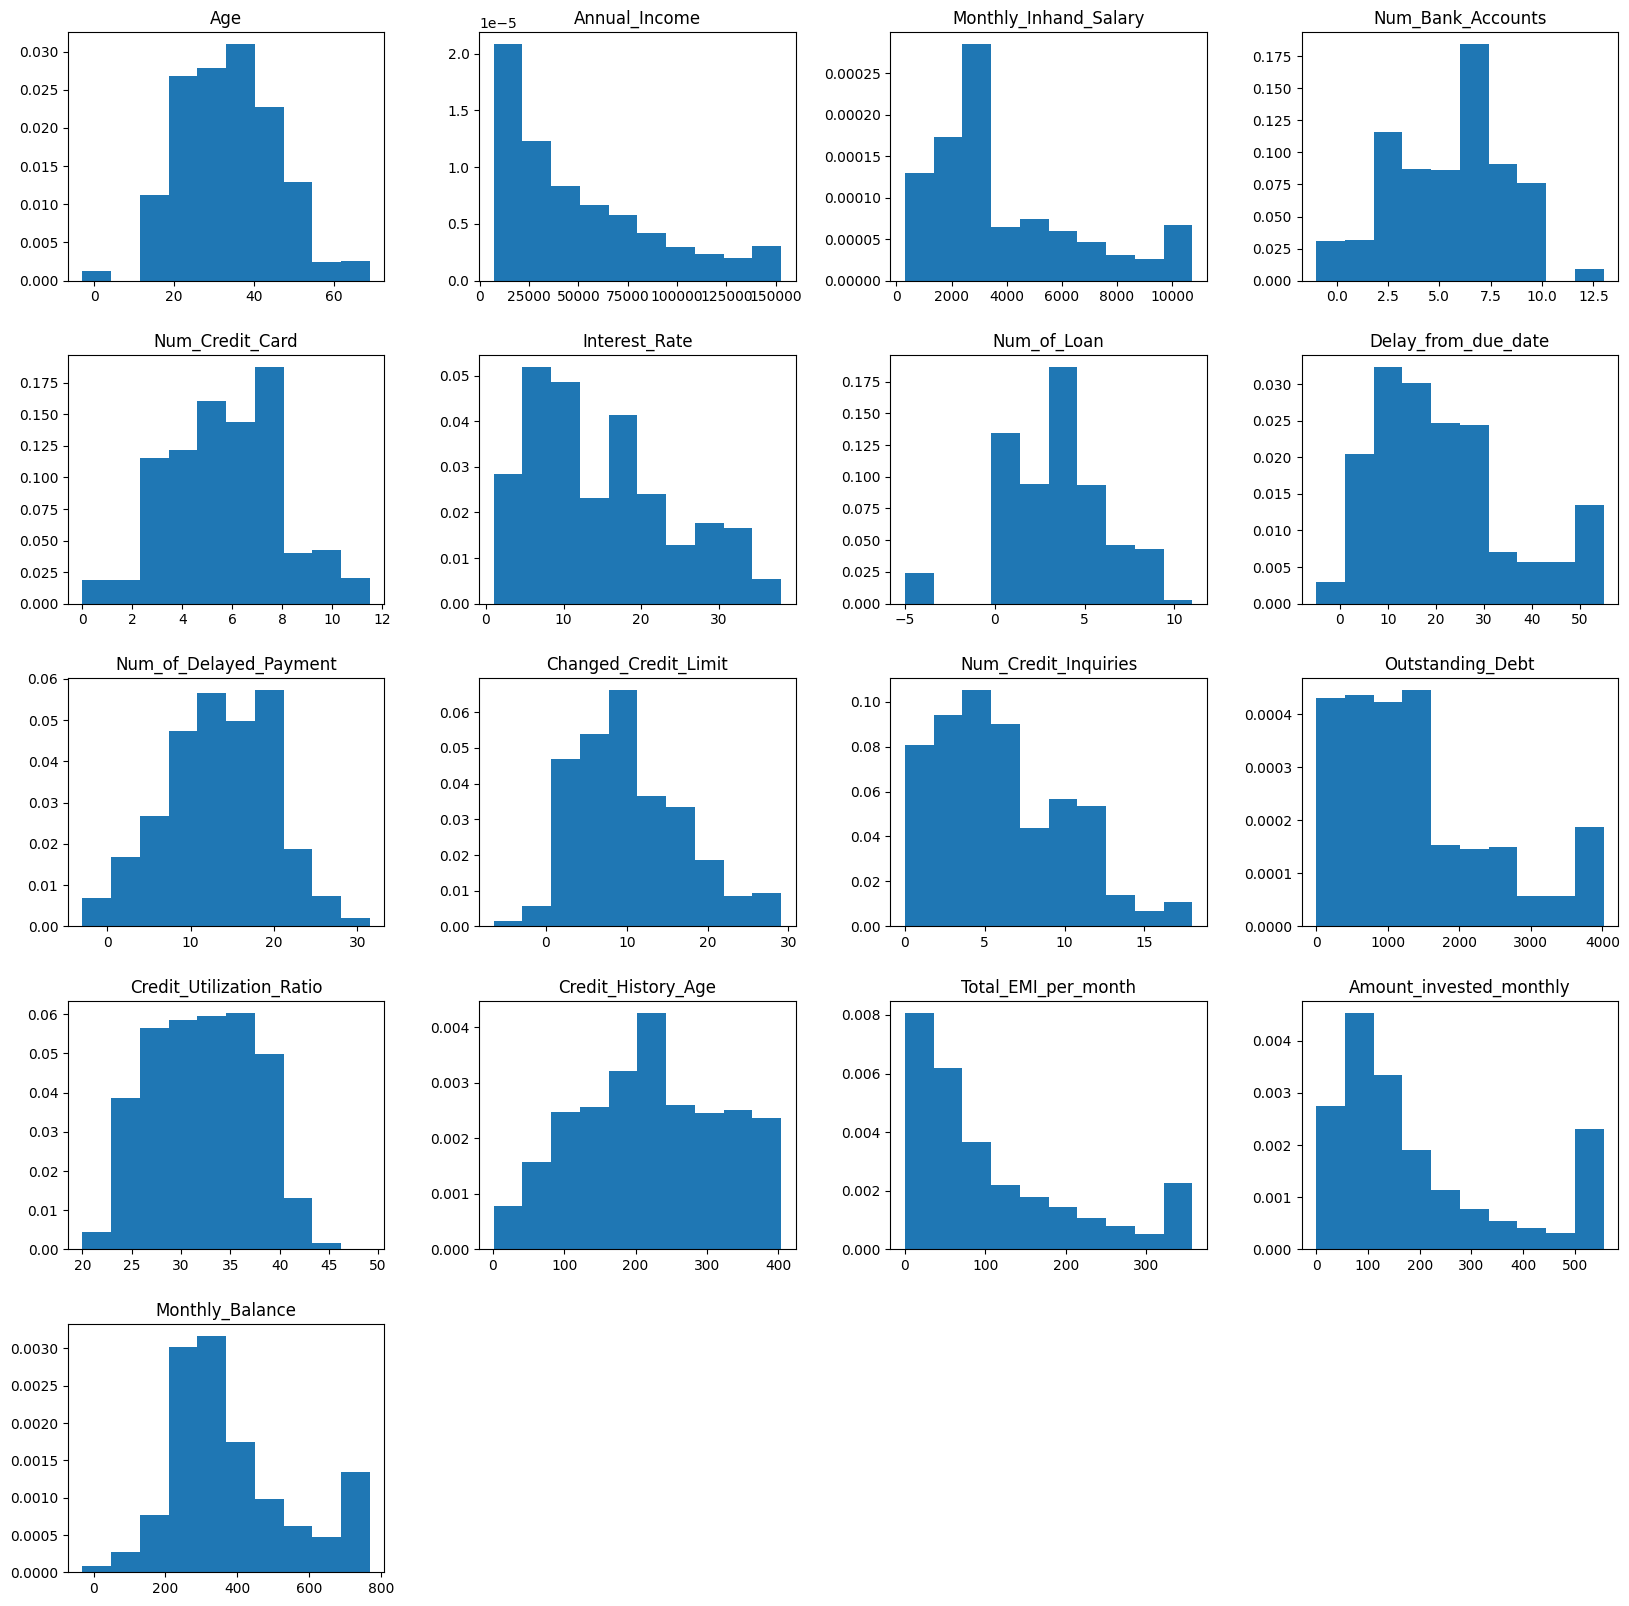

In [21]:
#Visualization
df_clean.hist(figsize=(20, 20), grid=False, density=True)
plt.show()

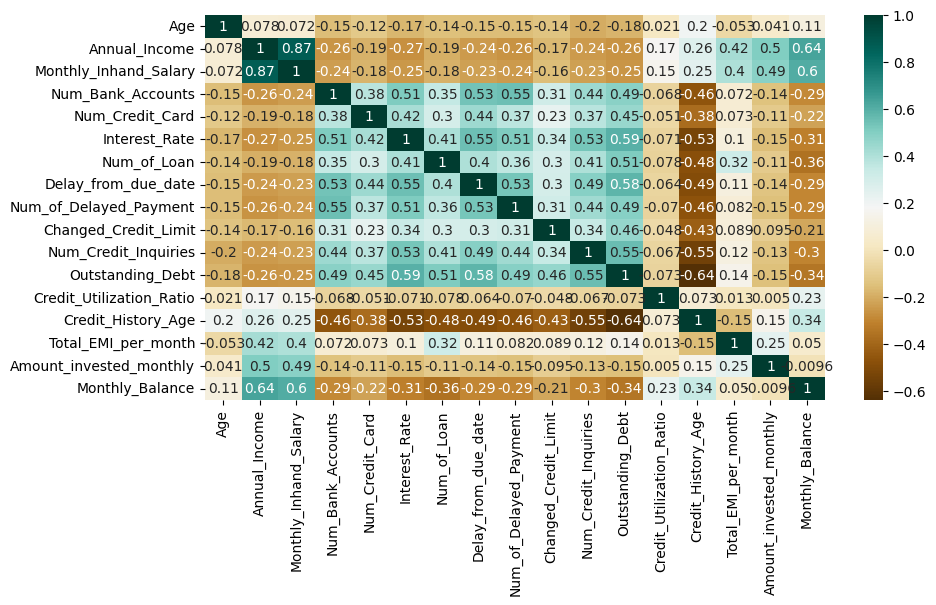

In [22]:
df_numeric = df_clean.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, cmap="BrBG", annot=True)
plt.show()

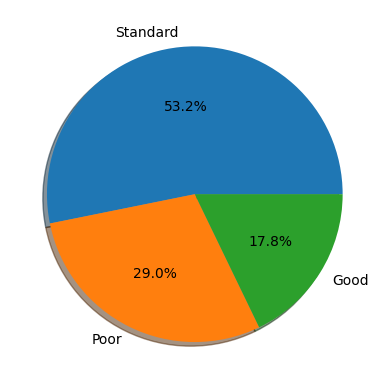

In [23]:
credit_socre_vals = df_clean.Credit_Score.value_counts().index
credit_socre_labels = df_clean.Credit_Score.value_counts().values

plt.pie(data = df_clean, x = credit_socre_labels, labels = credit_socre_vals, autopct = '%1.1f%%', shadow = True, radius = 1)
plt.show()

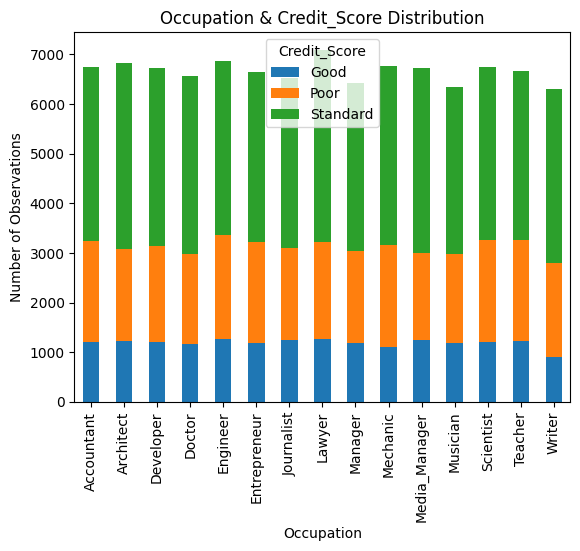

In [24]:
def create_stacked_bar_crosstab(data, cat_col1, cat_col2, rotation_val=0):

    # creating cross tab between two variables
    pd.crosstab(data[cat_col1], data[cat_col2]).plot(kind='bar', stacked=True)

    # adding title
    plt.title(f'{cat_col1} & {cat_col2} Distribution')

    # adding x and y label
    plt.xlabel(f'{cat_col1}')
    plt.ylabel('Number of Observations')

    # option for rotating xticks
    plt.xticks(rotation = rotation_val)
    plt.show()

create_stacked_bar_crosstab(data = df_clean, cat_col1 = 'Occupation', cat_col2 = 'Credit_Score', rotation_val = 90)

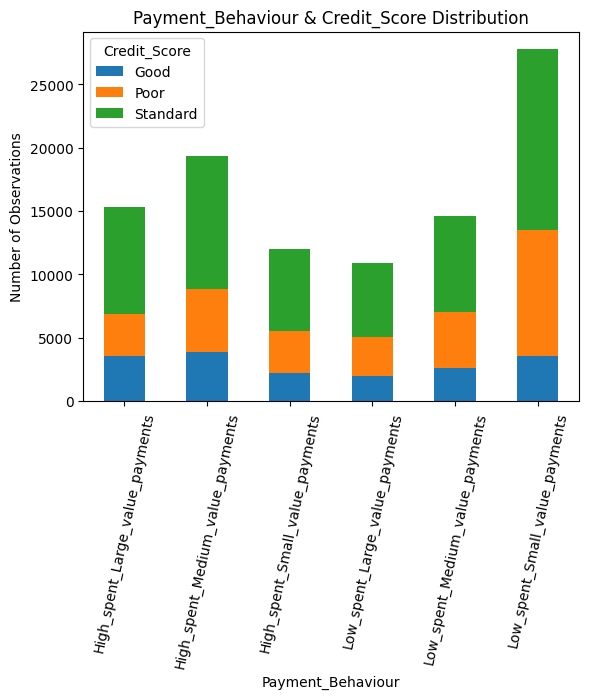

In [25]:
create_stacked_bar_crosstab(data = df_clean, cat_col1 = 'Payment_Behaviour', cat_col2 = 'Credit_Score', rotation_val=78)

In [26]:
#Encoding
df_clean['Month'] = pd.to_datetime(df_clean.Month, format='%B').dt.month

categorical_cols = ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
for column in categorical_cols:
    unique_values_count = len(df_clean[column].unique())
    print(f"Number of unique values in the '{column}' column:", unique_values_count)

Number of unique values in the 'Occupation' column: 15
Number of unique values in the 'Type_of_Loan' column: 6260
Number of unique values in the 'Credit_Mix' column: 3
Number of unique values in the 'Payment_of_Min_Amount' column: 3
Number of unique values in the 'Payment_Behaviour' column: 6


In [27]:
label_encoder = LabelEncoder()
df_clean['Type_of_Loan'] = label_encoder.fit_transform(df_clean['Type_of_Loan'])

# finding the unique values
print('Unique values in Payment_of_Min_Amount are: ', df_clean['Payment_of_Min_Amount'].unique())

Unique values in Payment_of_Min_Amount are:  ['No' 'NM' 'Yes']


In [28]:
target_mapping = {'No': 1, 'NM': 2, 'Yes': 3}
df_clean['Payment_of_Min_Amount'] = df_clean['Payment_of_Min_Amount'].map(target_mapping)

# mentioning the categorical columns where one-hot encoding needs to be performed
columns_to_encode = ['Occupation', 'Credit_Mix', 'Payment_Behaviour']

# creating dummy variables
df_dummy = pd.get_dummies(df_clean[columns_to_encode])

# concatenating the dummy variables with the original dataframe
df_processed = pd.concat([df_clean, df_dummy], axis=1)

# dropping the original categorical columns for which dummy variables were created
df_processed.drop(columns_to_encode, axis=1, inplace=True)

target_mapping = {'Poor': 1, 'Standard': 2, 'Good': 3}
df_processed['Credit_Score'] = df_processed['Credit_Score'].map(target_mapping)

df_processed.dtypes[df_processed.dtypes=='object']

,0
ID,object
Customer_ID,object
Name,object
SSN,object


In [29]:
#Feature reduction
df_clean.drop(['ID', 'Customer_ID', 'SSN', 'Name'], axis=1, inplace=True)

In [30]:
# Extract predictor variables (X) and target variable (y)
X = df_processed.drop('Credit_Score', axis=1)
y = df_processed['Credit_Score']

# 1. Convert categorical/object columns to numeric
for col in X.columns:
    if X[col].dtype == 'object':  # Check if the column type is object
        try:
            # Attempt to convert to numeric, if possible
            X[col] = pd.to_numeric(X[col], errors='coerce')
        except:
            # If conversion fails apply Label Encoding
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col].astype(str))

# 2. Check for missing values and handle them
if X.isnull().values.any():
    print("Warning: Missing values found. Filling with 0.")
    X.fillna(0, inplace=True)  # You can replace with dropna() if preferred

# 3. Ensure the target variable is numeric
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y.astype(str))

# 4. Train the RandomForest model
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# 5. Get the top 10 feature importances
feature_importances = rf_model.feature_importances_
top_10_rf = X.columns[feature_importances.argsort()[-10:][::-1]]

#print("Top 10 Features:", top_10_rf)

In [31]:
# Method 2: using Recursive Feature Elimination (RFE)
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=1)
rfe_selector.fit(X, y)
top_10_rfe = X.columns[rfe_selector.support_]

In [32]:
# Method 3: using Univariate Feature Selection
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X, y)
top_10_univariate = X.columns[selector.get_support()]

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 1 3 5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [33]:
print("Top 10 variables from Tree-Based Method:", ', '.join(top_10_rf))
print("---------------------------------------------------------------------------------------------------------")
print("Top 10 variables from Method Recursive Feature Elimination:", ', '.join(top_10_rfe))
print("---------------------------------------------------------------------------------------------------------")
print("Top 10 variables from Univariate Feature Selection:", ', '.join(top_10_univariate))

Top 10 variables from Tree-Based Method: Outstanding_Debt, Interest_Rate, Credit_History_Age, Delay_from_due_date, Changed_Credit_Limit, Credit_Mix_Standard, Num_Credit_Inquiries, Credit_Mix_Good, Monthly_Balance, Annual_Income
---------------------------------------------------------------------------------------------------------
Top 10 variables from Method Recursive Feature Elimination: Annual_Income, Interest_Rate, Delay_from_due_date, Changed_Credit_Limit, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Amount_invested_monthly, Monthly_Balance, Credit_Mix_Good
---------------------------------------------------------------------------------------------------------
Top 10 variables from Univariate Feature Selection: Interest_Rate, Delay_from_due_date, Num_of_Delayed_Payment, Num_Credit_Inquiries, Outstanding_Debt, Credit_History_Age, Payment_of_Min_Amount, Credit_Mix_Bad, Credit_Mix_Good, Credit_Mix_Standard


In [34]:
imp_columns = list(set(top_10_rf.tolist() + top_10_rfe.tolist() + top_10_univariate.tolist()))
imp_columns

['Credit_Mix_Good',
 'Num_of_Delayed_Payment',
 'Credit_History_Age',
 'Credit_Utilization_Ratio',
 'Credit_Mix_Bad',
 'Delay_from_due_date',
 'Interest_Rate',
 'Credit_Mix_Standard',
 'Monthly_Balance',
 'Amount_invested_monthly',
 'Annual_Income',
 'Outstanding_Debt',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Payment_of_Min_Amount']

In [35]:
print('Number of selected columns are: ', len(imp_columns))

Number of selected columns are:  15


In [36]:
#Checking multicollinearity

# extracting the selected independent features
X_selected = df_processed[imp_columns]

# creating correlation matrix
correlation_matrix = X_selected.corr()

# finding highly correlated feature pairs
highly_correlated_pairs = (correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1)

print("Highly correlated pairs of variables and their correlation values:\n")
checked_pairs = set() # To keep track of checked pairs
for col1 in X_selected.columns:
    for col2 in X_selected.columns:
        if col1 != col2 and (col1, col2) not in checked_pairs and (col2, col1) not in checked_pairs:
            if highly_correlated_pairs.loc[col1, col2]:
                correlation_value = correlation_matrix.loc[col1, col2]
                print(f"{col1} - {col2}: {correlation_value:.2f}")
                checked_pairs.add((col1, col2))

Highly correlated pairs of variables and their correlation values:

Credit_Mix_Good - Payment_of_Min_Amount: -0.75
Credit_Mix_Bad - Outstanding_Debt: 0.77


In [37]:
#remove the correlated columns
X_selected.drop(['Annual_Income', 'Credit_Mix_Good', 'Credit_Mix_Bad', 'Amount_invested_monthly',],
                axis=1, inplace=True)

<ipython-input-37-e3a03cfeaf62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected.drop(['Annual_Income', 'Credit_Mix_Good', 'Credit_Mix_Bad', 'Amount_invested_monthly',],


In [38]:
#Variance inflation factor (VIF)

# Convert boolean columns to int
X_selected['Credit_Mix_Standard'] = X_selected['Credit_Mix_Standard'].astype(int)

# Check for NaNs and replace if necessary
#print(X_selected.isna().sum())  # Check for NaNs
X_selected = X_selected.fillna(0)  # Replace NaNs with 0 if applicable

# Check for infinite values
X_selected.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
X_selected.fillna(0, inplace=True)  # Replace NaNs with 0

# Calculate VIF again
vif_df = pd.DataFrame()
vif_df["Variable"] = X_selected.columns
vif_df["VIF"] = [variance_inflation_factor(X_selected.values, i)
                 for i in range(X_selected.shape[1])]

print("Variance Inflation Factors:")
print(vif_df)

<ipython-input-38-3da8f079dd33>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['Credit_Mix_Standard'] = X_selected['Credit_Mix_Standard'].astype(int)


Variance Inflation Factors:
                    Variable        VIF
0     Num_of_Delayed_Payment   9.102556
1         Credit_History_Age   8.408614
2   Credit_Utilization_Ratio  23.966903
3        Delay_from_due_date   5.839673
4              Interest_Rate   7.239447
5        Credit_Mix_Standard   3.012678
6            Monthly_Balance   7.142573
7           Outstanding_Debt   7.609806
8       Changed_Credit_Limit   4.915212
9       Num_Credit_Inquiries   5.586489
10     Payment_of_Min_Amount  15.576685


In [39]:
print('Number of selected columns are: ', len(X_selected.columns))

Number of selected columns are:  11


In [40]:
final_X_cols = X_selected.columns.tolist()
print("Final selected predictors are: ", ', '.join(final_X_cols))

Final selected predictors are:  Num_of_Delayed_Payment, Credit_History_Age, Credit_Utilization_Ratio, Delay_from_due_date, Interest_Rate, Credit_Mix_Standard, Monthly_Balance, Outstanding_Debt, Changed_Credit_Limit, Num_Credit_Inquiries, Payment_of_Min_Amount


In [41]:
#final dataset for modeling with the twelve selected independent features and the target (dependent) variable
df_final = df_processed[final_X_cols + ['Credit_Score']]

In [42]:
#Scaling data
X = df_final.drop('Credit_Score',axis=1)
y = df_final['Credit_Score']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [43]:
#Balancing data
y.value_counts()

,count
Credit_Score,
2,53174
1,28998
3,17828


In [44]:
len(X)

100000

In [45]:
smote = SMOTE()

# fitting SMOTE to the data
X_bal, y_bal = smote.fit_resample(X, y)

y_bal.value_counts()

,count
Credit_Score,
3,53174
2,53174
1,53174


In [46]:
len(X_bal)

159522

In [47]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=123,
                                                    stratify = y_bal)
# finding number of rows and column of the train and test dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(111665, 11)
(47857, 11)
(111665,)
(47857,)


In [48]:
#Model Building

# List of classifiers to test
classifiers = [('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()),
 ('KNN', KNeighborsClassifier(n_neighbors=5)), ('Gaussion NB',GaussianNB())]

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
  scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

  avg_accuracy = scores.mean()
  avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
  avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()


  print(f'Classifier: {clf_name}')
  print(f'Average Accuracy: {avg_accuracy:.4f}')
  print(f'Average Precision: {avg_precision:.4f}')
  print(f'Average Recall: {avg_recall:.4f}')
  print('-----------------------')


Classifier: Decision Tree
Average Accuracy: 0.7431
Average Precision: 0.7427
Average Recall: 0.7427
-----------------------
Classifier: Random Forest
Average Accuracy: 0.8313
Average Precision: 0.8313
Average Recall: 0.8317
-----------------------
Classifier: KNN
Average Accuracy: 0.7743
Average Precision: 0.7753
Average Recall: 0.7743
-----------------------
Classifier: Gaussion NB
Average Accuracy: 0.6814
Average Precision: 0.6832
Average Recall: 0.6814
-----------------------


In [49]:
#Fitting best model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

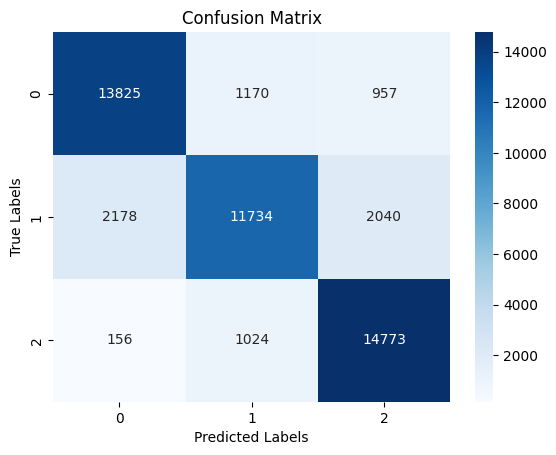

In [50]:
# Evaluating model
y_test_pred = rf_classifier.predict(X_test)

# evaluating model through a confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues',fmt='.0f')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [51]:
print("Classification Report")
print(classification_report(y_test, y_test_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.86      0.87      0.86     15952
           2       0.84      0.74      0.79     15952
           3       0.83      0.93      0.88     15953

    accuracy                           0.84     47857
   macro avg       0.84      0.84      0.84     47857
weighted avg       0.84      0.84      0.84     47857



In [52]:
#Implementing Model on New Data
serving_df = pd.read_csv('Serving_Data_clean.csv')

# creating a copy of the serving data
df_new = serving_df
df_new.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Occupation_Accountant',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Not Specified', 'Credit_Mix_Standard',
       'Payment_Be

In [53]:
df_new = df_new[final_X_cols]

In [57]:
# Convert the 'Credit_Mix_Standard' column from boolean to uint8
df_new['Credit_Mix_Standard'] = df_new['Credit_Mix_Standard'].astype('uint8')

<ipython-input-57-f4c4e6211f58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Credit_Mix_Standard'] = df_new['Credit_Mix_Standard'].astype('uint8')


In [58]:
df_new.dtypes

,0
Num_of_Delayed_Payment,float64
Credit_History_Age,float64
Credit_Utilization_Ratio,float64
Delay_from_due_date,float64
Interest_Rate,float64
Credit_Mix_Standard,uint8
Monthly_Balance,float64
Outstanding_Debt,float64
Changed_Credit_Limit,float64
Num_Credit_Inquiries,float64


In [59]:
df_new.isna().sum()

,0
Num_of_Delayed_Payment,0
Credit_History_Age,0
Credit_Utilization_Ratio,0
Delay_from_due_date,0
Interest_Rate,0
Credit_Mix_Standard,0
Monthly_Balance,0
Outstanding_Debt,0
Changed_Credit_Limit,0
Num_Credit_Inquiries,0


In [60]:
# making predictions using the model
predictions = rf_classifier.predict(df_new)

# appending the predictions to the original dataset
serving_df['Credit_Score'] = pd.Series(predictions)

# viewing the final dataset with predictions
serving_df


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix_Good,Credit_Mix_Not Specified,Credit_Mix_Standard,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Score
0,0x160a,CUS_0xd40,9,Aaron Maashoh,23.0,821-00-0265,19114.12,1824.843333,3.0,4.0,...,True,False,False,False,False,False,False,False,True,1
1,0x160b,CUS_0xd40,10,Aaron Maashoh,24.0,821-00-0265,19114.12,1824.843333,3.0,4.0,...,True,False,False,False,True,False,False,False,False,1
2,0x160c,CUS_0xd40,11,Aaron Maashoh,24.0,821-00-0265,19114.12,1824.843333,3.0,4.0,...,True,False,False,False,False,False,False,True,False,2
3,0x160d,CUS_0xd40,12,Aaron Maashoh,24.0,821-00-0265,19114.12,3086.305000,3.0,4.0,...,True,False,False,False,True,False,False,False,False,1
4,0x1616,CUS_0x21b1,9,Rick Rothackerj,28.0,004-07-5839,34847.84,3037.986667,2.0,4.0,...,True,False,False,True,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,12,Sarah McBridec,70.0,031-35-0942,20002.88,1929.906667,10.0,8.0,...,False,False,False,False,False,False,False,False,True,1
49996,0x25fee,CUS_0x942c,9,Nicks,25.0,078-73-5990,39628.99,3086.305000,4.0,6.0,...,True,False,False,False,False,False,False,False,True,1
49997,0x25fef,CUS_0x942c,10,Nicks,25.0,078-73-5990,39628.99,3359.415833,4.0,6.0,...,True,False,False,False,False,False,True,False,False,1
49998,0x25ff0,CUS_0x942c,11,Nicks,25.0,078-73-5990,39628.99,3086.305000,4.0,6.0,...,True,False,False,False,False,True,False,False,False,1
